In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [4]:
def col(lst):
    ans = []
    for x in lst[0]:
        if (x == 1):
            ans.append("#cfabcd")
        else:
            ans.append("#000000")
    return ans

In [5]:
import matplotlib.pyplot as plt
u = 10 ** (-5)
    
class Work:
    def __init__(self, df, C, dx, dy):
        self.df = df
        self.C = C
        self.cls = []
        self.dx = dx
        self.dy = dy
        self.alpha = [0.] * self.df.shape[0]
        self.X = np.mat(self.df.drop('class', axis=1))
        self.Y = np.mat(self.df['class'].map({'P': 1, 'N': -1}))
        self.alpha = np.mat(self.alpha)
        self.w = []
        self.w0 = []
    
    def coord_to_clr(self, i, clk):
        return clk[i][0]
    
    def forAll(self):
        for j in range(10000):
            grad = self.alpha * np.multiply((self.Y.T * self.Y), (self.X * self.X.T)) - 1
            self.alpha -= (u * grad)
            for i in range(self.alpha.shape[1]):
                if (self.alpha.item(i) < 0):
                    self.alpha.itemset(i, 0)
            for i in range(self.alpha.shape[1]):
                if (self.alpha.item(i) > self.C):
                    self.alpha.itemset(i, self.C)
            l = (self.alpha * self.Y.T) / ((self.Y * self.Y.T).sum())
            self.alpha -= l * self.Y
            for i in range(self.alpha.shape[1]):
                if (self.alpha.item(i) < 0):
                    self.alpha.itemset(i, 0)
            for i in range(self.alpha.shape[1]):
                if (self.alpha.item(i) > self.C):
                    self.alpha.itemset(i, self.C)
        self.w = np.mat([0.] * self.X.shape[1])
        self.cls = []
        for i, row in enumerate(self.X):
            self.w += self.alpha.item(i) * self.Y.item(i) * row
            self.w0 = (self.w * self.X.T - self.Y).mean()
        self.cls = np.array(np.sign(((self.w * XTest.T) - self.w0)))
        
    def kvadr(self, XTest):
        INF = 4000
        figure, axis = plt.subplots()
        points = [0] * INF * INF
        ind = 0
        for i in range(-2000, 2000):
            for j in range(-2000, 2000):
                points[ind] = [i / 1000, j / 1000, (i * i + j * j) / 10 ** 6]
                ind += 1
        #points = np.mat([[i / 1000, j / 1000, (i * i + j * j) / 10 ** 6] for i in range(-2000, 2000) for j in range(-2000, 2000)])
        points = np.mat(points)
        clk = np.array(np.sign(((self.w * points.T) - self.w0))).T
        xs = []
        for i in range(-2000, 2000):
            xs.append(i / 1000)
        c = [0] * INF
        for i in range(INF):
            c[i] = [0] * INF
            for j in range(INF):
                c[i][j] = self.coord_to_clr(i * INF + j, clk)
        print(c)
        axis.pcolormesh(xs, xs, c)
        plt.scatter(list(self.X[:, 0]), list(self.X[:, 1]), c=col(np.array(self.Y)))
        
    def linear(self, XTest):
        x = np.linspace(self.dx, self.dy, 1000)
        plt.scatter(list(XTest[:, 0]), list(XTest[:, 1]), c=col(np.array(self.Y)))
        #print(w.item(1))
        plt.plot(x, ((-self.w.item(0) * x + self.w0) / self.w.item(1)), color='red')
        #print(2)
        plt.show()
        
    def fMera(self, XTest, YTest):
        #print(3)
        lst = []
        lst.clear()
        for i in range(XTest.shape[0]):
            lst.append([self.cls.item(i), i])
        #print(lst)
        sz = 2
        mas = [0] * sz
        t = [0] * sz
        c = [0] * sz
        p = [0] * sz
        fp = [0] * sz
        fn = [0] * sz
        for i in range(sz):
            mas[i] = [0] * sz
        for i in lst:
            #print(YTest.item(i[1]), i[0])
            if (YTest.item(i[1]) == 'N'):
                if (i[0] == -1):
                    mas[0][0] += 1
                else:
                    mas[0][1] += 1
            else:
                if (i[0] == -1):
                    mas[1][0] += 1
                else:
                    mas[1][1] += 1
        #print(mas)
        for i in range(sz):
            t[i] = mas[i][i]
            c[i] = sum(mas[i])
            fn[i] = c[i] - t[i]
        for i in range(sz):
            for j in range(sz):
                p[j] += mas[i][j]
        for i in range(sz):
            fp[i] = p[i] - t[i]
        precw = 0
        for i in range(sz):
            if (p[i] != 0):
                precw += t[i] * c[i] / p[i]
        precw /= sum(c)

        prec = [0] * sz
        recall = [0] * sz
        for i in range(sz):
            if (t[i] + fn[i] != 0):
                recall[i] = t[i] / (t[i] + fn[i])
            if (t[i] + fp[i] != 0):
                prec[i] = t[i] / (t[i] + fp[i])

        recallw = 0
        for i in range(sz):
            recallw += t[i]
        recallw /= sum(c)
        macro = 0
        if (precw + recallw != 0):
            macro = 2 * precw * recallw / (precw + recallw)
        return macro


  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

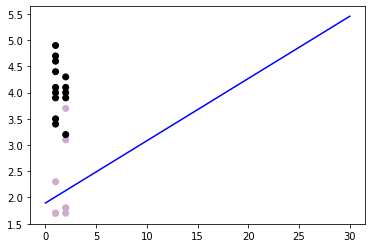

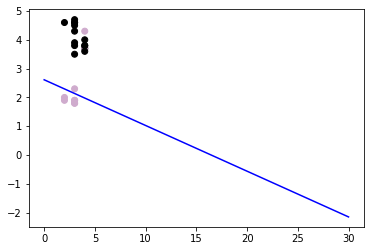

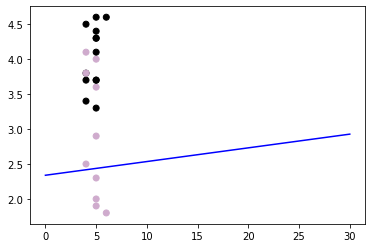

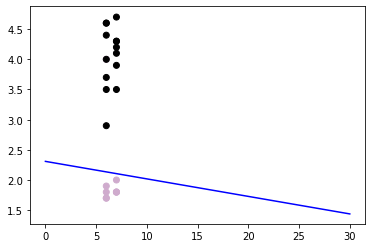

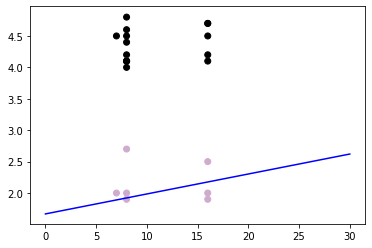

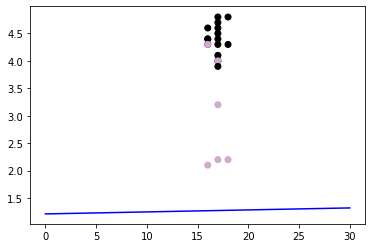

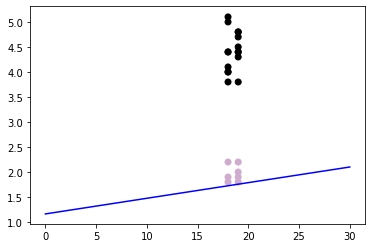

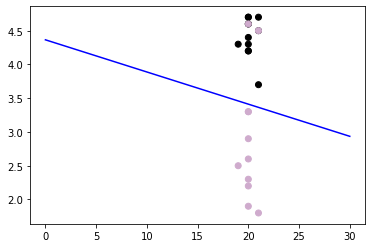

In [ ]:
df2 = pd.read_csv("geyser.csv")
df2 = pd.DataFrame(df2)
C = [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
lst = [0] * (len(C) * 20)
nex = 0
for c in C:
    u = 10 ** (-6)
    for j in tqdm(range(20)):
        sz = df2.shape[0]
        #print(sz // 10)
        lst1 = [0] * 10
        df2['kernel'] = 1
        for i in range(10):
            df = df2[df2.index >= i * (sz // 10 + 1)]
            df = df[df.index < min(sz, (i + 1) * (sz // 10 + 1))]
            XTest = df2[df2.index >= i * (sz // 10 + 1)]
            XTest = XTest[XTest.index < min(sz, (i + 1) * (sz // 10 + 1))].drop('class', axis=1)
            XTest = np.mat(XTest)
            YTest = df2['class'][df2.index >= i * (sz // 10 + 1)]
            YTest = YTest[YTest.index < (i + 1) * (sz // 10 + 1)]
            YTest = np.mat(YTest)
            work2 = Work(df, c, 0, 30)
            work2.forAll()
            #print(df)
            work2.linear(XTest)
            lst1[i] = work2.fMera(XTest, YTest)
        lst[nex] = sum(lst1) / len(lst1)
        nex += 1
        u += 1e-6
print(np.argmax(lst))

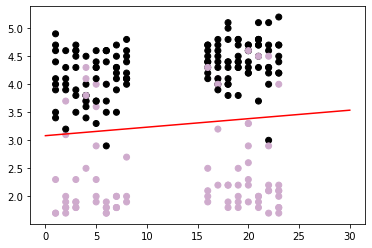

0.9132211394137034


In [7]:
df2 = pd.read_csv("geyser.csv")
df2 = pd.DataFrame(df2)
ans = 0
u = 10 ** (-6)
C = [100.0]
for c in C:
    #for j in tqdm(range(20)):
        sz = df2.shape[0]
        #print(sz // 10)
        df2['kernel'] = 1
        df = df2
        XTest = df2.drop('class', axis=1)
        XTest = np.mat(XTest)
        YTest = df2['class']
        YTest = np.mat(YTest)
        work2 = Work(df, c, 0, 30)
        work2.forAll()
        #print(df)
        work2.linear(XTest)
        ans = work2.fMera(XTest, YTest)
        #u += 1e-5
print(ans)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:35<00:00, 95.97s/it]


[0.7716358649306866]


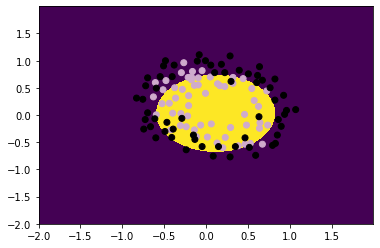

In [6]:
df1 = pd.read_csv("chips.csv")
df1 = pd.DataFrame(df1)
df1['kernel'] = df1['x'] ** 2 + df1['y'] ** 2
#C = [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
#for c in C:
#    work1 = Work(df1, c, -1, 1)
#    work1.forAll()
#    work1.kvadr()
    
ans = 0
u = 10 ** (-6) * 14
nex = 0
C = [0.5]
lst = [0] * (len(C))
for c in C:
    #u = 10 ** (-6)
    for j in tqdm(range(1)):
    #for j in tqdm(range(20)):
        sz = df1.shape[0]
        #print(sz // 10)
        df = df1
        XTest = df1.drop('class', axis=1)
        XTest = np.mat(XTest)
        YTest = df1['class']
        YTest = np.mat(YTest)
        work1 = Work(df, c, 0, 30)
        work1.forAll()
        #print(df)
        work1.kvadr(XTest)
        ans = work1.fMera(XTest, YTest)
        lst[nex] = ans
        nex += 1
        u += 1e-6
print(lst)

In [9]:
np.argmax(lst)


55